In [6]:
from scipy import integrate
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pylab
import cv2
from scipy.ndimage.filters import gaussian_filter1d

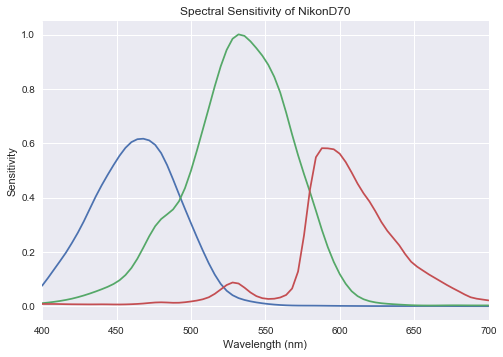

In [8]:
#Camera's Spectral Sensitivity
X, red = [], []
green, blue = [], []
for line in open('Nikon70.txt', 'r'):
  values = [float(s) for s in line.split()]
  X.append(values[0])
  red.append(values[1]) #red
  green.append(values[2]) #green
  blue.append(values[3]) #blue

plt.style.use('seaborn')
plt.plot(X, blue)
plt.plot(X, green)
plt.plot(X, red)
plt.title('Spectral Sensitivity of NikonD70')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Sensitivity')
plt.xlim(400, 700)
plt.show()

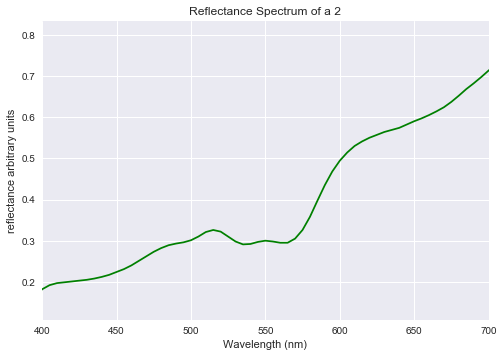

In [9]:
#Reflectance of the image
X1, Y1 = [], []
for line in open('2.txt', 'r'):
  values = [float(s) for s in line.split()]
  X1.append(values[0])
  Y1.append(values[1])

plt.style.use('seaborn')
plt.plot(X1, Y1, 'green')
plt.title('Reflectance Spectrum of a 2')
plt.xlabel('Wavelength (nm)')
plt.ylabel('reflectance arbitrary units')
plt.xlim(400, 700)
plt.show()




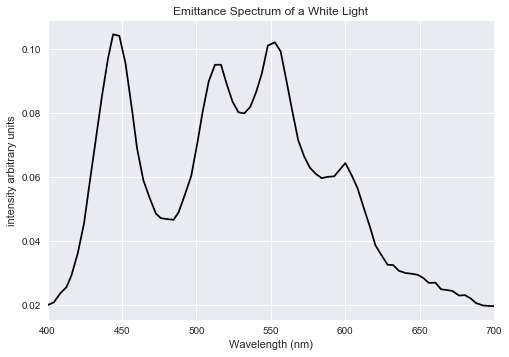

In [4]:
#Spectrum of Emittance of Light Source
X2, Y2 = [], []
for line in open('emission_spectrum.txt', 'r'):
  values = [float(s) for s in line.split()]
  X2.append(values[0])
  Y2.append(values[1])

plt.style.use('seaborn')
plt.plot(X2, Y2, 'black')
plt.title('Emittance Spectrum of a White Light')
plt.xlabel('Wavelength (nm)')
plt.ylabel('intensity arbitrary units')
plt.xlim(400, 700)
plt.show()


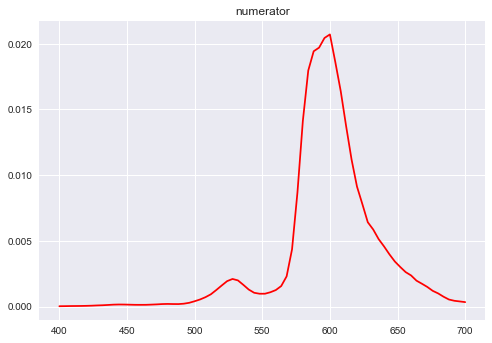

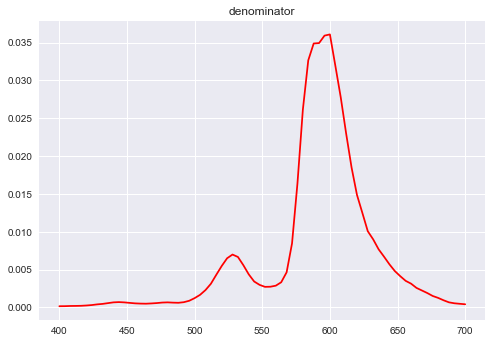

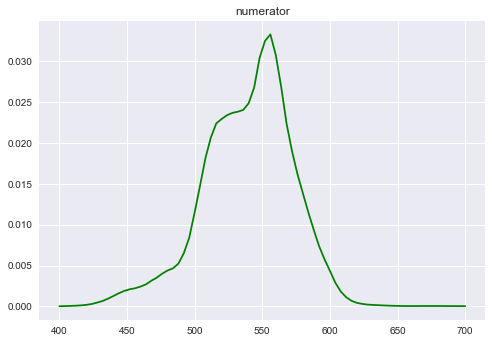

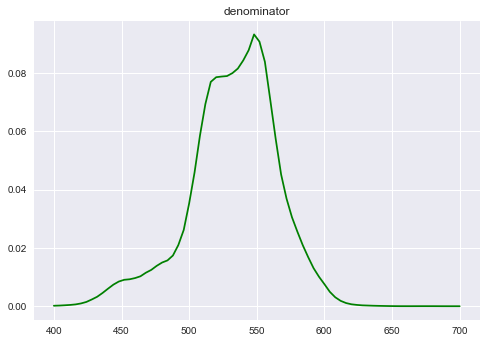

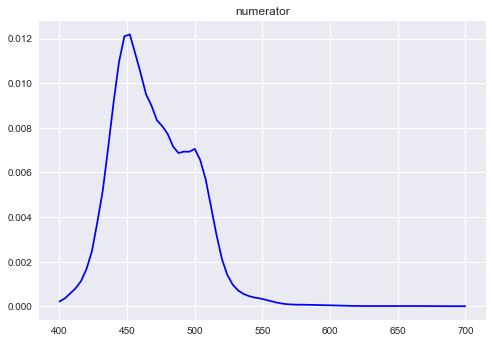

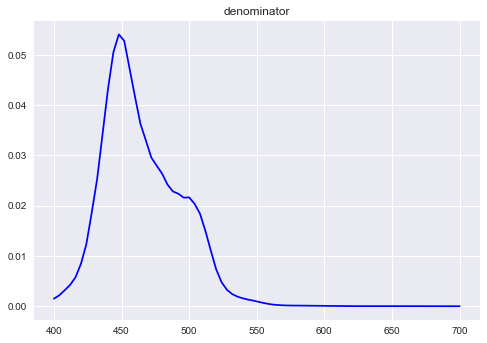

Red: 139.49687515558173
Green: 88.9521428467253
Blue: 65.47497017545425


In [5]:
#Red
F = np.multiply(red, Y1)
G = np.multiply(F, Y2)
G1 = np.multiply(Y2, red)
plt.plot(X, G, 'red') #numerator
plt.title('numerator')
plt.show()
area1 = np.trapz(G, X)
plt.plot(X, G1, 'red') #denominator
plt.title('denominator')
plt.show()
area2 = np.trapz(G1, X)

#Green
H = np.multiply(green, Y1)
I = np.multiply(H, Y2)
I1 = np.multiply(Y2, green)
plt.plot(X, I, 'green')
plt.title('numerator')
plt.show()
area4 = np.trapz(I, X)
plt.plot(X, I1, 'green')
plt.title('denominator')
plt.show()
area5 = np.trapz(I1, X)

#Blue
J = np.multiply(blue, Y1 )
K = np.multiply(J, Y2)
K1 = np.multiply(Y2, blue)
plt.plot(X, K, 'blue')
plt.title('numerator')
plt.show()
area7 = np.trapz(K, X)

plt.plot(X, K1, 'blue')
plt.title('denominator')
plt.show()
area8 = np.trapz(K1, X)

print('Red:', ((area1/area2)*255))
print('Green:', ((area4/area5)*255))
print('Blue:', ((area7/area8)*255))

# 2. Macbeth

In [77]:
M = np.loadtxt('reflectance_spectrum.txt', float)
x1 = M[:,0]
y1 = M[:,1]

R = np.loadtxt('Macbeth.txt', float)
x2 = R[:,0]
y2 = R[:,24]

Sr = np.loadtxt('Nikon70.txt', float)
yr = Sr[:,1]

Sg = np.loadtxt('Nikon70.txt', float)
yg = Sg[:,2]

Sb = np.loadtxt('Nikon70.txt', float)
yb = Sb[:,3]

Msmoothed = gaussian_filter1d(y1, sigma=4)
Rsmoothed = gaussian_filter1d(y2, sigma=4)
Srsmoothed = gaussian_filter1d(yr, sigma=3)
Sgsmoothed = gaussian_filter1d(yg, sigma=3)
Sbsmoothed = gaussian_filter1d(yb, sigma=3)

yr_n = (Msmoothed*Rsmoothed*Srsmoothed)
yr_d = (Msmoothed*Srsmoothed)
yg_n = (Msmoothed*Rsmoothed*Sgsmoothed)
yg_d = (Msmoothed*Sgsmoothed)
yb_n = (Msmoothed*Rsmoothed*Sbsmoothed)
yb_d = (Msmoothed*Sbsmoothed)

arearn = np.trapz(yr_n, x2)
areagn = np.trapz(yg_n, x2)
areabn = np.trapz(yb_n, x2)

areard = np.trapz(yr_d, x2)
areagd = np.trapz(yg_d, x2)
areabd = np.trapz(yb_d, x2)

#print('Area under the curve =', area)
print('Red value =', 255*(arearn/areard)*4)
print('Green value =', 255*(areagn/areagd)*4)
print('Blue value =', 255*(areabn/areabd)*4)

Red value = 33.59660197611875
Green value = 34.205791229542925
Blue value = 35.30223631532398
